# Data processing

### Import packages

In [38]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('perluniprops')
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

import csv
import re
import pickle

### Import data

In [11]:
df = pd.read_csv('FoodReviews/Reviews.csv')

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
new_df = df.get(['Score','Text'])
new_df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


### Score distribution

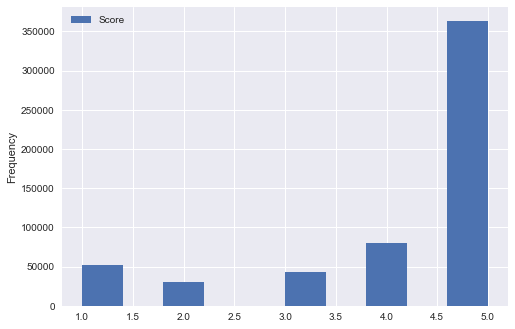

The data set contains 568454 reviews.
Of which 443777 (0.780674) are positive reviews (score 4-5).
And 124677 (0.219326) are negative reviews (score 1-3).


In [14]:
#plt.hist(new_df.get(['Score']).value);
new_df.plot.hist()
plt.show()

nbr_points = len(new_df.Score)
pos_score = 0
neg_score = 0
for score in new_df.Score:
    if score <= 3:
        neg_score += 1
    else:
        pos_score += 1
        
print('The data set contains %d reviews.' %nbr_points)
print('Of which %d (%f) are positive reviews (score 4-5).' %(pos_score,pos_score/nbr_points))
print('And %d (%f) are negative reviews (score 1-3).' %(neg_score,neg_score/nbr_points))

In [34]:
# Remove <this> and make lowercase
texts = new_df.Text.values
#print(texts)
j=0
texts_revised = []
for row in texts:
    tmp = re.sub(r'<.+?>', ' ', row)
    texts_revised.append(tmp.lower())

In [35]:
new_revised_df = new_df.copy()
new_revised_df['Text'] = texts_revised.copy()
new_revised_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


### WORD CLOUD

There are 246927397 words in the combination of all reviews.


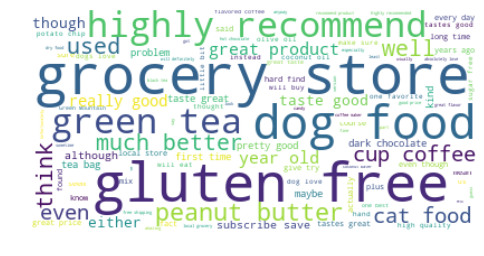

In [47]:
###### SCORE DISTRIBUTION ######

###### WORDCLOUD #######
text = " ".join(review for review in new_df.Text)
print ("There are {} words in the combination of all reviews.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#wordcloud.to_file("img/first_review.png")

### TOKENIZE

In [36]:
#from nltk.tokenize import MWETokenizer
from nltk.tokenize import RegexpTokenizer
#tokenizer = MWETokenizer()
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
text_col = new_revised_df.Text.values
token_text = [tokenizer.tokenize(row) for row in text_col]

In [37]:
# Check the tokenize result
print(len(token_text))
print(token_text[0])

568454
['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'my', 'labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', '.']


### Redo labels (score)

In [40]:
labels = []
for val in new_revised_df.Score.values:
    if val<=3:
        labels.append(0)
    else:
        labels.append(1)    

### Save to a data frame

In [42]:
d = {'Score': new_revised_df.Score.values, 'Label': labels, 'Text': token_text}
review_df = pd.DataFrame(data=d)
review_df.head()

,Score,Label,Text
0,5,1,"[i, have, bought, several, of, the, vitality, ..."
1,1,0,"[product, arrived, labeled, as, jumbo, salted,..."
2,4,1,"[this, is, a, confection, that, has, been, aro..."
3,2,0,"[if, you, are, looking, for, the, secret, ingr..."
4,5,1,"[great, taffy, at, a, great, price, ., there, ..."


### Save tokenized data

In [43]:
with open('tokenized_reviews.pickle', 'wb') as handle:
    pickle.dump(review_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Check save

In [45]:
with open('tokenized_reviews.pickle', 'rb') as handle:
    saved_df = pickle.load(handle)

In [46]:
saved_df.head()

,Score,Label,Text
0,5,1,"[i, have, bought, several, of, the, vitality, ..."
1,1,0,"[product, arrived, labeled, as, jumbo, salted,..."
2,4,1,"[this, is, a, confection, that, has, been, aro..."
3,2,0,"[if, you, are, looking, for, the, secret, ingr..."
4,5,1,"[great, taffy, at, a, great, price, ., there, ..."
